In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')
%matplotlib inline

In [2]:
#load dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# view data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
print(train['Survived'].value_counts())

Survived
0    549
1    342
Name: count, dtype: int64


In [14]:
# Fill missing Age with median
train['Age'].fillna(train['Age'].median(), inplace=True)

# Fill missing Embarked with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

# Drop Cabin (too many missing values)
train.drop(columns=['Cabin'], inplace=True)

# Check again
train.isnull().sum()


C:\Users\MM\AppData\Local\Temp\ipykernel_1232\3485645988.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\MM\AppData\Local\Temp\ipykernel_1232\3485645988.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

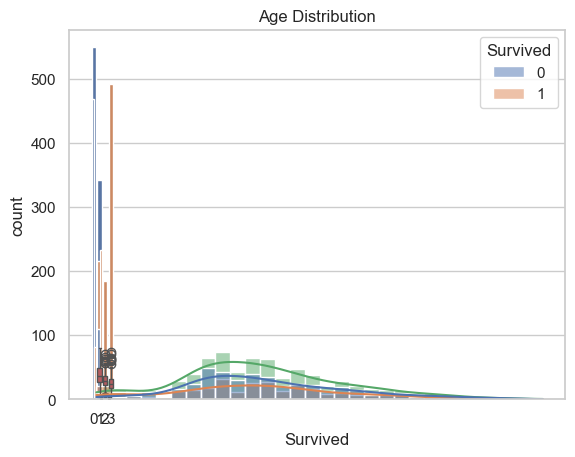

<Figure size 800x600 with 0 Axes>

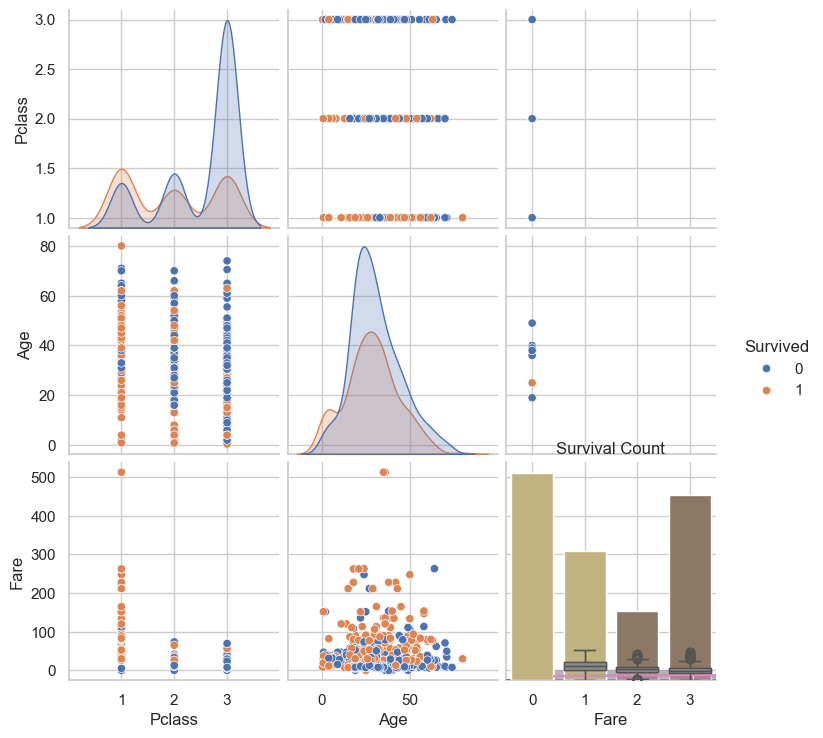

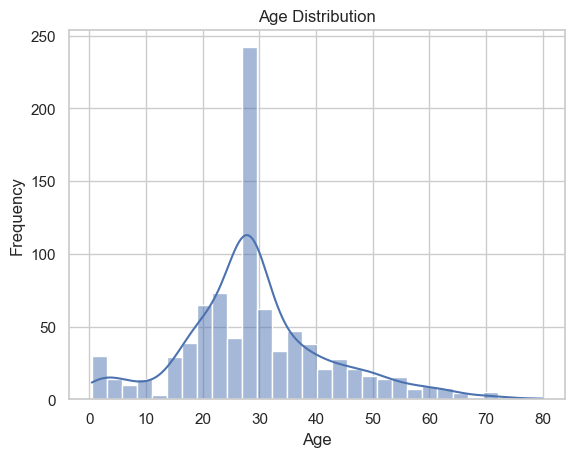

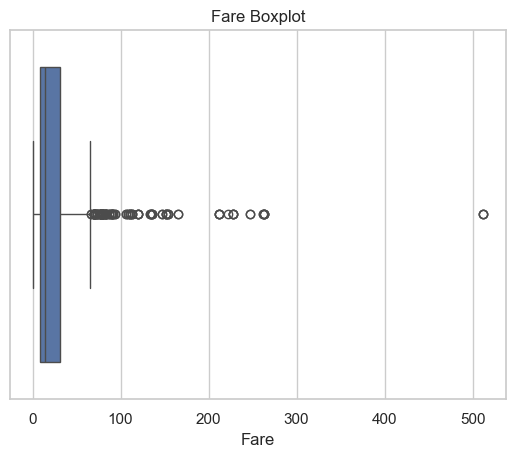

In [15]:
# Survived Countplot
sns.countplot(x='Survived', data=train)
plt.title('Survival Count')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Age Distribution
sns.histplot(train['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Fare Distribution
sns.boxplot(x='Fare', data=train)
plt.title('Fare Boxplot')
plt.show()


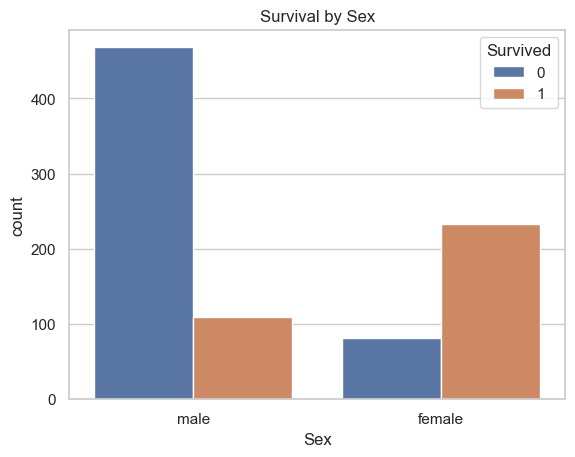

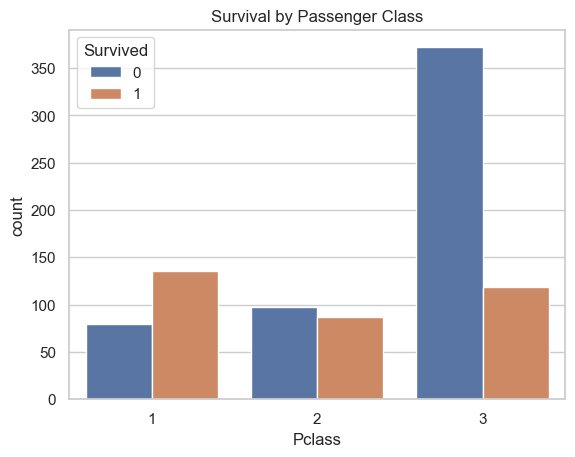

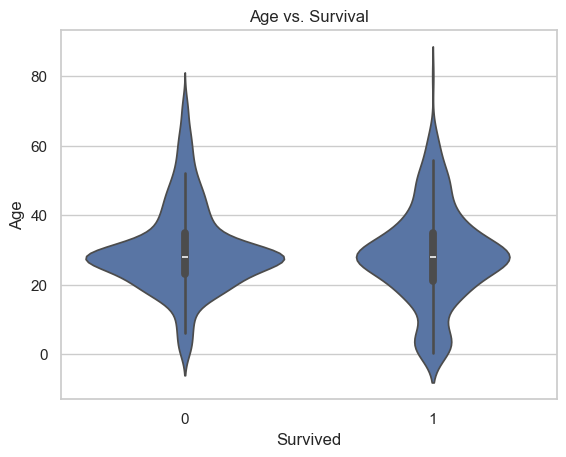

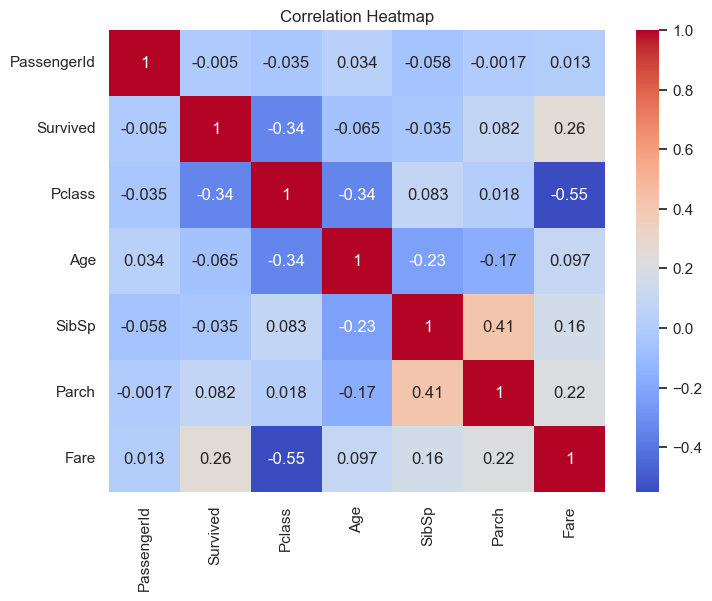

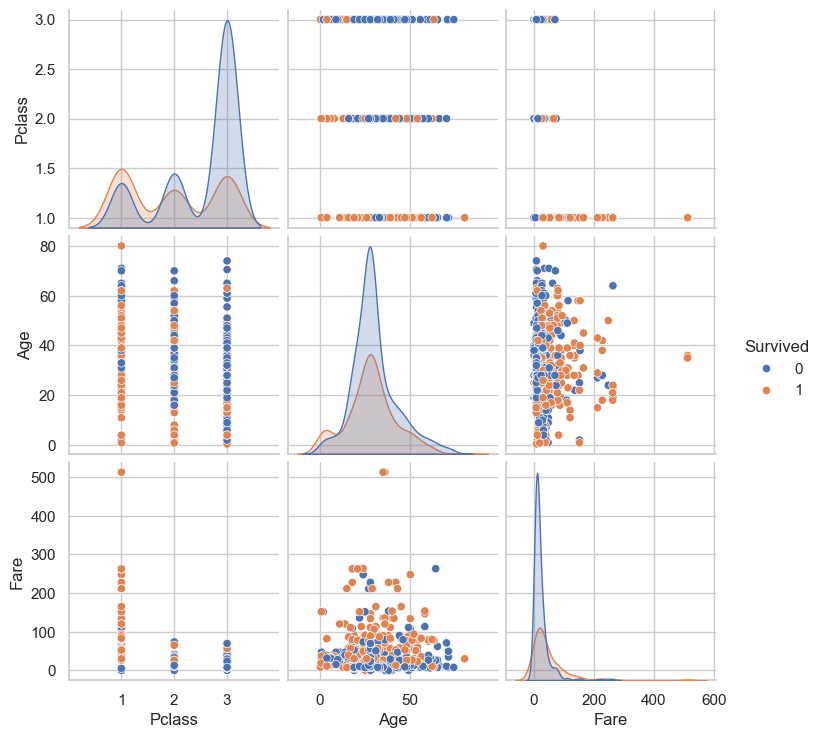

In [17]:
# Survival by Sex
sns.countplot(x='Sex', hue='Survived', data=train)
plt.title('Survival by Sex')
plt.show()

# Survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.title('Survival by Passenger Class')
plt.show()

# Age vs. Survival
sns.violinplot(x='Survived', y='Age', data=train)
plt.title('Age vs. Survival')
plt.show()

# Correlation Heatmap (Numeric only)
numeric_cols = train.select_dtypes(include='number')
plt.figure(figsize=(8,6))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Pairplot (Selected features)
sns.pairplot(train[['Survived', 'Pclass', 'Age', 'Fare']], hue='Survived')
plt.show()


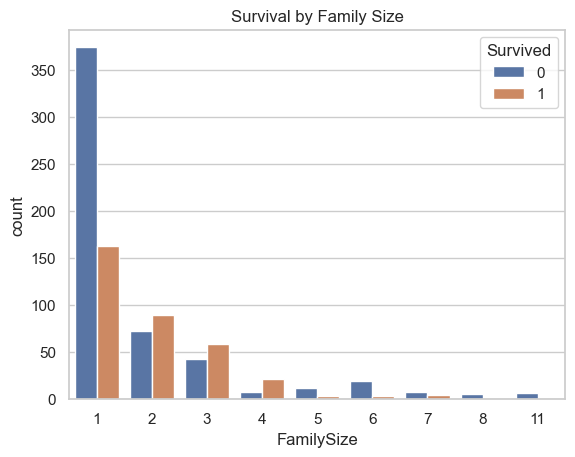

In [18]:
# Create new feature: FamilySize
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1

# Survival by Family Size
sns.countplot(x='FamilySize', hue='Survived', data=train)
plt.title('Survival by Family Size')
plt.show()
